# Import necessary lib

In [1]:
#from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import math

# build Kmean class

In [2]:
class KMean:
    def __init__(self, centroids = None, clusters = None, threshold = 3):
        self.centroids = centroids
        self.clusters = clusters
        self.threshold = threshold

    def fit(self, k = 2, data = None, thre = 0):
        if data is None:
            print('error: data empty!!!')
            return 0
       
        if self.centroids is None:
            self.centroids = self.get_centroids(k, data)
            
        clusters = self.clustering(k, data)

        if self.clusters is None:
            self.update_centroids_1st(k, data, clusters)
        else:
            self.update_centroids(k, data)
            
        
        if self.clusters != clusters or thre < self.threshold:
            self.clusters = clusters
            self.fit(k, data, thre + 1)

        return 1

         
    # choose first centroids list
    def get_centroids(self, k, data):
        centroids = []
        for i in range(k):
            c = []
            for j in range(len(data[0])):
                c.append(data[i][j])
            centroids.append(c)
        return centroids
        
    def get_label(self, k, object):
        min_d = float('inf')
        label = 0
        for i in range(k):
            sum = 0
            for j in range(len(object)):
                sum = sum + (object[j] - self.centroids[i][j])**2
            d = np.sqrt(sum)
            if min_d > d:
                min_d = d
                label = i
                
        return label
    
    # get label for all of objects
    def clustering(self, k, data):
        clusters = []
        label = None
        for i in range(len(data)):
            label = self.get_label(k, data[i])
            clustering_i = []
            for j in range(k):
                if j == label:
                    clustering_i.append(1)
                else:
                    clustering_i.append(0)
            clusters.append(clustering_i)

        return clusters

    def update_centroids_1st(self, k, data, clusters):
        self.centroids = []
        for i in range(k):
            centroid = []
            num_feat = len(data[0])
            value = None
            for j in range(num_feat):
                de = self.get_de(clusters, i)
                nu = self.get_nu(data, clusters, j, i)
                value = nu/de
                centroid.append(value)
            self.centroids.append(centroid)
        return 1

    def update_centroids(self, k, data):
        self.centroids = []
        for i in range(k):
            centroid = []
            num_feat = len(data[0])
            value = None
            for j in range(num_feat):
                de = self.get_de(self.clusters, i)
                nu = self.get_nu(data, self.clusters, j, i)
                value = nu/de
                centroid.append(value)
            self.centroids.append(centroid)
        return 1
    
    def get_nu(self, data, clusters, data_i, cluster_i):
        sum = 0
        num_obj = len(data)
        for i in range(num_obj):
            sum = sum + clusters[i][cluster_i] * data[i][data_i]
            
        return sum

    def get_de(self, clusters, index):
        sum = 0
        for i in range(len(clusters)):
            sum = sum + clusters[i][index]
            
        return sum

    def get_clus(self):
        clus = self.clusters
        return clus

    def get_cen(self):
        cen = self.centroids
        return cen

# clustering simple data(2d) into 2 cluster

1

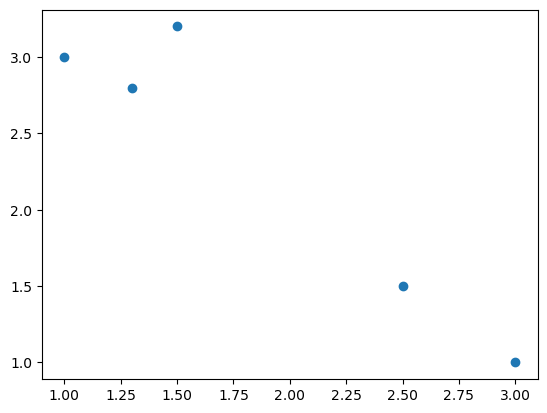

In [3]:
test = [[3, 1], [1, 3], [1.5, 3.2], [1.3, 2.8], [2.5, 1.5]]
df_test = pd.DataFrame(test)
plt.scatter(df_test[0], df_test[1])
clf = KMean()
clf.fit(2, test)

# check result

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


          0     1
0  2.750000  1.25
1  1.266667  3.00


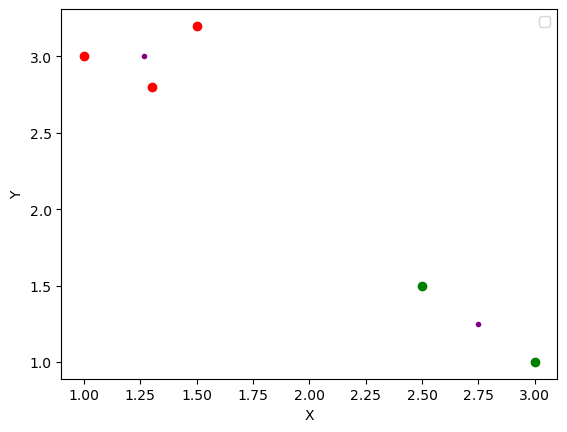

In [4]:
def get_simple_clusters(data, model):
    clusters = model.get_clus()
    simple_clusters = []
    for i in range(len(data)):
        simple_clusters.append(-1)

    for i in range(len(clusters)):
        for j in range(len(clusters[0])):
            if clusters[i][j] == 1:
                data[i].append(j)
            
    return data
    
result = get_simple_clusters(test, clf)

cen = pd.DataFrame(clf.get_cen())
print(cen)

c0 = [x for x in result if x[2] == 0]
c1 = [x for x in result if x[2] == 1]

df0 = pd.DataFrame(c0)
df1 = pd.DataFrame(c1)

plt.scatter(df0[0], df0[1], color = 'green')
plt.scatter(df1[0], df1[1], color = 'red')
plt.scatter(cen[0], cen[1], color = 'purple', marker = '.')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# try clustering data(2d) into 3 cluster

In [5]:
df = pd.read_csv("income.csv")
df.head()


,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


# tranfer and filter dataset

In [6]:
list = df.values.tolist()

dataset = []
for i in range(len(list)):
    x = []
    for j in range(len(list[0])):
        if isinstance(list[i][j], int):
            x.append(list[i][j])
    dataset.append(x)
    
print(dataset)

[[27, 70000], [29, 90000], [29, 61000], [28, 60000], [42, 150000], [39, 155000], [41, 160000], [38, 162000], [36, 156000], [35, 130000], [37, 137000], [26, 45000], [27, 48000], [28, 51000], [29, 49500], [32, 53000], [40, 65000], [41, 63000], [43, 64000], [39, 80000], [41, 82000], [39, 58000]]


# draw 

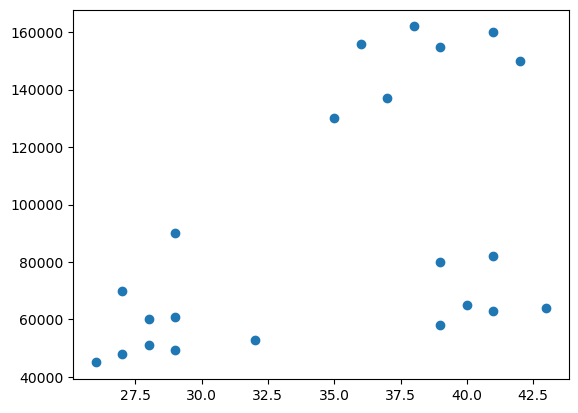

In [7]:
x = [i[0] for i in dataset]
y = [i[1] for i in dataset]
plt.scatter(x, y)

# clustering

In [8]:
clf_k3 = KMean()
clf_k3.fit(3, dataset)

1

# check result

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


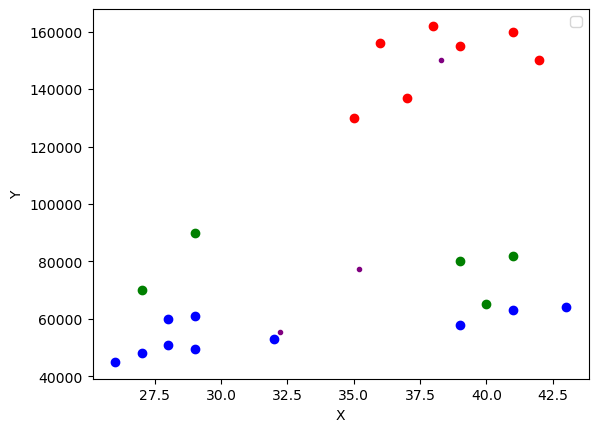

In [9]:
def get_simple_clusters(data, model):
    clusters = model.get_clus()
    simple_clusters = []
    for i in range(len(data)):
        simple_clusters.append(-1)

    for i in range(len(clusters)):
        for j in range(len(clusters[0])):
            if clusters[i][j] == 1:
                data[i].append(j)

    a = pd.DataFrame(data)
    return data
    
result_k3 = get_simple_clusters(dataset, clf_k3)

cen_k3 = pd.DataFrame(clf_k3.get_cen())

c0 = [_ for _ in result_k3 if _[2] == 0]
c1 = [_ for _ in result_k3 if _[2] == 1]
c2 = [_ for _ in result_k3 if _[2] == 2]

df0 = pd.DataFrame(c0)
df1 = pd.DataFrame(c1)
df2 = pd.DataFrame(c2)

plt.scatter(df0[0], df0[1], color = 'green')
plt.scatter(df1[0], df1[1], color = 'red')
plt.scatter(df2[0], df2[1], color = 'blue')
plt.scatter(cen_k3[0], cen_k3[1], color = 'purple', marker = '.')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# PROBLEM: X_AXIS IS NARROW

# SOLVE PROBLEM

In [10]:
list = df.values.tolist()

dataset = []
for i in range(len(list)):
    x = []
    for j in range(len(list[0])):
        if isinstance(list[i][j], int):
            x.append(list[i][j])
    dataset.append(x)


# Scaler

In [11]:
scaler = MinMaxScaler()
scaler.fit(dataset)
dataset = scaler.transform(dataset)
dataset = dataset.tolist()
print(dataset)

[[0.05882352941176472, 0.21367521367521375], [0.17647058823529416, 0.38461538461538464], [0.17647058823529416, 0.13675213675213677], [0.11764705882352944, 0.12820512820512825], [0.9411764705882355, 0.8974358974358976], [0.7647058823529411, 0.9401709401709404], [0.8823529411764706, 0.982905982905983], [0.7058823529411766, 1.0000000000000002], [0.5882352941176472, 0.9487179487179489], [0.5294117647058822, 0.7264957264957266], [0.6470588235294117, 0.7863247863247864], [0.0, 0.0], [0.05882352941176472, 0.02564102564102566], [0.11764705882352944, 0.05128205128205132], [0.17647058823529416, 0.03846153846153849], [0.3529411764705883, 0.06837606837606841], [0.8235294117647061, 0.17094017094017094], [0.8823529411764706, 0.1538461538461539], [1.0, 0.16239316239316243], [0.7647058823529411, 0.29914529914529914], [0.8823529411764706, 0.3162393162393163], [0.7647058823529411, 0.1111111111111111]]


In [12]:
clf_k3 = KMean()
clf_k3.fit(3, dataset)

1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


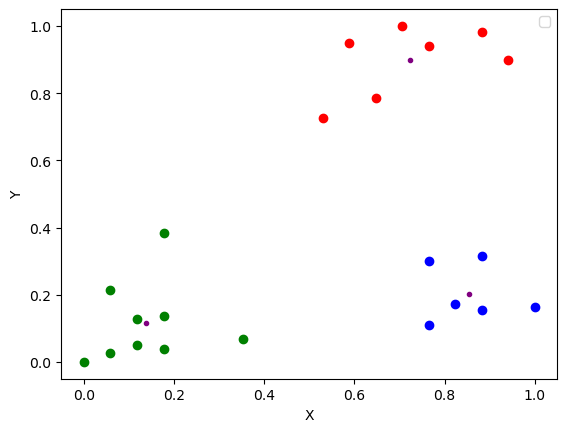

In [13]:
def get_simple_clusters(data, model):
    clusters = model.get_clus()
    simple_clusters = []
    for i in range(len(data)):
        simple_clusters.append(-1)

    for i in range(len(clusters)):
        for j in range(len(clusters[0])):
            if clusters[i][j] == 1:
                data[i].append(j)

    a = pd.DataFrame(data)
    return data
    
result_k3 = get_simple_clusters(dataset, clf_k3)

cen_k3 = pd.DataFrame(clf_k3.get_cen())

c0 = [_ for _ in result_k3 if _[2] == 0]
c1 = [_ for _ in result_k3 if _[2] == 1]
c2 = [_ for _ in result_k3 if _[2] == 2]

df0 = pd.DataFrame(c0)
df1 = pd.DataFrame(c1)
df2 = pd.DataFrame(c2)

plt.scatter(df0[0], df0[1], color = 'green')
plt.scatter(df1[0], df1[1], color = 'red')
plt.scatter(df2[0], df2[1], color = 'blue')
plt.scatter(cen_k3[0], cen_k3[1], color = 'purple', marker = '.')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
